<center>
<img src="https://image.aladin.co.kr/product/12609/37/cover500/k372532974_1.jpg" width="200" height="200"><br>
</center>


 - Github: [PinkWink](https://github.com/PinkWink/DataScience)

### 8장 자연어 처리 시작하기

- 한글 자연어 처리기초
- 워드 클라우드
- 육아휴직 관련 법안에 대한 분석
- Naive Bayes Classifier의 이해 - 영문
- Naive Bayes Classifier의 이해 - 한글
- 문장의 유사도 측정하기
- 여자친구 선물 고르기


#### 8-2 한글 자연어 처리 기초



In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

먼저 꼬꼬마 모듈을 사용할 수 있게 한다.

In [3]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

그리고 문장(sentences)분석을 한다. ~~시작합니다 재미있어요 ~~ 에서 마침표(.)가 없어도 두 개의 문장으로 구분한다.

In [5]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

명사(nouns)분석도 수행합니다.

In [6]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

현태소(pos)분석도 수행합니다. 한글은 영어와 달리 단어의 형태 변화가 많아서 영어처럼 쉽게 접근하기 어렵다. 그래서 최소한의 의미 단위인 현태소로 언어를 분석하는 것이 일반적이다.

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

이번에는 한나눔(Hannanum)을 사용해 보겠다.

In [8]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

한나눔의 명사 분석은 꼬꼬마와는 약간 다른 결과를 가져온다.

In [10]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

한나눔의 형태소 분석 결과 이다.

In [11]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

이번에는 트위터(Twitter) 분석이다.

In [12]:
from konlpy.tag import Twitter
t = Twitter()

/home/ubuntu/.local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [14]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [16]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

역시 미세한 차이를 가지고 있다.

In [17]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

### 8-3 워드 클라우드

워드 클라우드(world cloud)는 자주 나타나는 단어를 크게 보여줌으로써 직관적으로 텍스트를 알리는데 도움을 준다. 파이썬에서 사용할 수 있는 워드 클라우드도 몇가지 있습니다만 여기서는 그중 하나를 소개할까 한다. 설치는 이미 8-1절에서 했으니 워드 클라우드 공식 Github에서 배포하는 튜토리얼을 일부 수정한 것을 우리도 튜토리얼하고 다음 절로 넘어가도록 하겠다.

In [22]:
#!pip3 install wordcloud

In [25]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

먼저 필요한 몇몇 모듈을 import 한다. 그리고 이상한 나라의 앨리스 영문 버전을 다운 받아서 data폴더에 저장하고 읽는다. 또한 앨리그 그림도 저장하자.

In [26]:
text = open('./data/09. alice.txt').read()
alice_mask = np.array(Image.open('./data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

앨리스 소설에는 said 라는 단어가 많이 등장하는 모양이다. 이 단어는 카운트에서 제거하도록 하자.

In [28]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    re('font', family='AppleGothic')
elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family = font_name)
else:
        print('Unknown system... sorry~~~~')
        
%matplotlib inline

Unknown system... sorry~~~~


언제나 하는 matplotlib에서 한글 폰트를 설정했다.

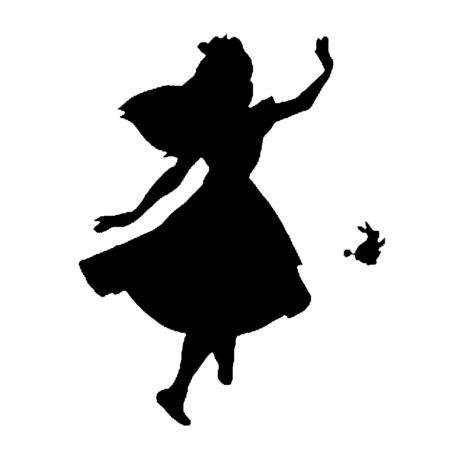

In [30]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()